# Time-Series Forecasting: Predicting Stock Prices Using Facebook’s Prophet Model

In order to develop a model that could capture seasonality in time-series data, Facebook developed the famous Prophet model that is publicly available for everyone. In this notebook, we will use this state-of-the-art model: the Prophet model. 

Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models.

The mathematical equation behind the Prophet model is defined as:

y(t) = g(t) + s(t) + h(t) + e(t)

with:

- g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.
- s(t) represents periodic changes (weekly, monthly, yearly).
- h(t) represents the effects of holidays (recall: Holidays impact businesses).
- e(t) is the error term.

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

### Data
Thanks to Yahoo finance we can get the data for free. Use the following link to get the stock price history of Google: https://finance.yahoo.com/quote/GOOG/history?period1=1433548800&period2=1591833600&interval=1d&filter=history&frequency=1d

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv("GOOG.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


### Inspect the data
Let’s print some statistics such as the mean, median, min, max and standard deviation values for the above features (columns).

In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,982.884677,991.980983,974.031114,983.451723,983.451723,1.723477e+06
std,231.644952,234.464420,229.580341,232.283568,232.283568,8.638005e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.475000e+05
25%,769.570007,774.500000,764.652511,769.252502,769.252502,1.212700e+06
50%,1020.130005,1034.104981,1008.305023,1021.044983,1021.044983,1.488950e+06
75%,1159.880005,1174.482544,1150.543488,1163.472442,1163.472442,1.964575e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,1.116490e+07


### Build the predictive model
Let’s move on with the modeling now. We will only use the dates and the Close price as features for our model.

In [3]:
# Select only the important features i.e. the date and price
data = data[["Date", "Close"]] # select Date and Price

# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


### Note
In this notebook, we will not split the data into training and test sets but instead we will use all the data to fit the model and then ask the model to predict future values i.e. the stock price in 2021.

Usually people split the data into training and testing because they do not want to train the model on the test set as well. If we keep a test set hidden, then the model will forecast values on unseen data. In that case, we would be also able to measure the error of the model.

Next, we import the Prophet class from the fbprophet module and then create an object of the Prophet class.

In [5]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2 MB 8.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=d416937912a9a2f70e7fa6098044c367df4946b8e5c33111289d51e3c4bf949b
  Stored in directory: /home/azureuser/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [6]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

### Plot the predictions

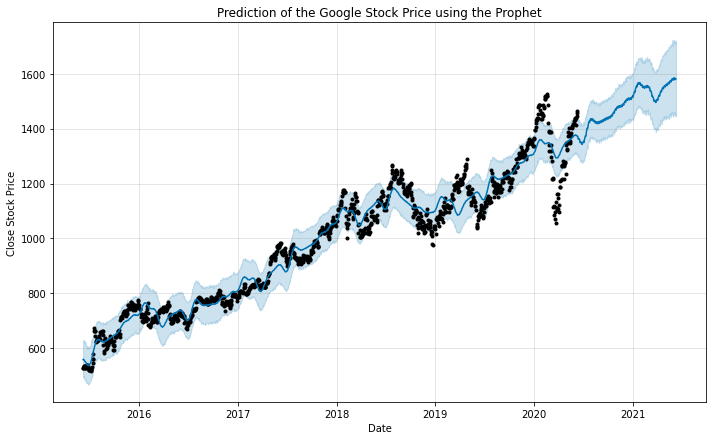

In [7]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

The model used all the data for the training (black dots) and predicted the future stock price from June 2020 till June 2021 ! Blue shadow is the confidence interval.

### Plot the trend, weekly, seasonally, yearly and daily components

If you want to see the forecast components i.e. trend, weekly, seasonally, yearly and daily components, then you can do this using the following command

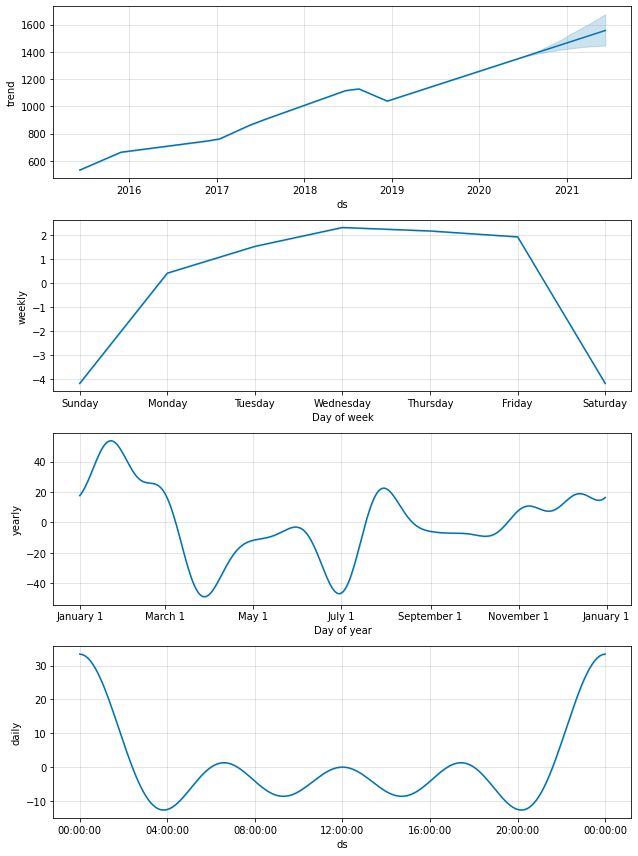

In [8]:
m.plot_components(prediction)
plt.show()